In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from concurrent.futures import ThreadPoolExecutor
import os

In [2]:
def showImg(img):
    plt.imshow(img)
    plt.show()

In [3]:
def getImg(path, title=""):
    img = cv2.imread(path)
    plt.imshow(img)
    plt.title(title)
    plt.show()
    return img

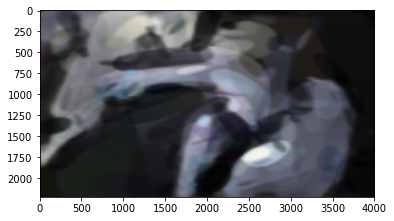

In [4]:
img3 = getImg("./output/generated249.png")

In [5]:
start_list_height = list(range(0, img3.shape[0], img3.shape[0]//8))
end_list_height = [i-1 for i in start_list_height if i>0]
end_list_height.append(img3.shape[0]-1)

start_list_width = list(range(0, img3.shape[1], img3.shape[1]//8))
end_list_width = [i-1 for i in start_list_width if i>0]
end_list_width.append(img3.shape[1]-1)
all_idxs = []
for i in list(zip(start_list_height, end_list_height)):
    for j in list(zip(start_list_width, end_list_width)):
        all_idxs.append(i+j)
random.shuffle(all_idxs)
len(all_idxs)

72

In [6]:
def concat(origin, diff, s):
    img = np.zeros_like(diff)
    img[s[0]:s[1], s[2]:s[3], :] = diff[s[0]:s[1], s[2]:s[3], :]
    return origin + img

In [7]:
def saveImg(img, path):
    cv2.imwrite(path, img)

In [8]:
def save_origin_idx(origin_idx , all_idxs):
    random.shuffle(all_idxs)
    origin_img = getImg("./output/generated{}.png".format(origin_idx))
    next_img = getImg("./output/generated{}.png".format(origin_idx+1))
    diff = next_img - origin_img
    last = origin_img
    for i in range(len(all_idxs)):
        s = all_idxs[i]
        after = concat(last, diff, s)
        last = after
        saveImg(after, "./output/generated{}_{}.png".format(origin_idx, i))
        print("./output/generated{}_{}.png".format(origin_idx, i))

In [9]:
thread_pool = ThreadPoolExecutor(max_workers=5)

for origin_idx in range(250,320):
    future = thread_pool.submit(save_origin_idx, origin_idx, all_idxs)

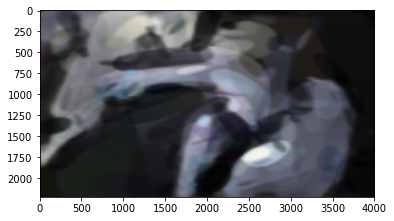

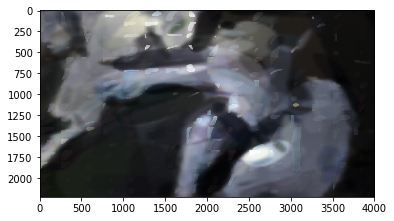

./output/generated249_0.png
./output/generated249_1.png
./output/generated249_2.png
./output/generated249_3.png
./output/generated249_4.png
./output/generated249_5.png
./output/generated249_6.png
./output/generated249_7.png
./output/generated249_8.png
./output/generated249_9.png
./output/generated249_10.png
./output/generated249_11.png
./output/generated249_12.png
./output/generated249_13.png
./output/generated249_14.png
./output/generated249_15.png
./output/generated249_16.png
./output/generated249_17.png
./output/generated249_18.png
./output/generated249_19.png
./output/generated249_20.png
./output/generated249_21.png
./output/generated249_22.png
./output/generated249_23.png
./output/generated249_24.png
./output/generated249_25.png
./output/generated249_26.png
./output/generated249_27.png
./output/generated249_28.png
./output/generated249_29.png
./output/generated249_30.png
./output/generated249_31.png
./output/generated249_32.png
./output/generated249_33.png
./output/generated249_34

In [26]:
save_origin_idx(249, all_idxs)

In [16]:
for origin_idx in range(250,320):
    for i in range(len(all_idxs)):
        try:
            os.remove("./output/generated{}_{}.png".format(origin_idx, i))
        except Exception as e:
            print(e)

NameError: name 'all_idxs' is not defined

## 多线程补充

In [12]:
import requests
base_url = "https://raw.githubusercontent.com/LinXueyuanStdio/Silly-AI-learns-to-paint/master/output/generated"

In [13]:
from tqdm import tqdm

def downloadFILE(url,name):
    resp = requests.get(url=url,stream=True)
    #stream=True的作用是仅让响应头被下载，连接保持打开状态，
    content_size = int(resp.headers['Content-Length'])/1024 /1024  #确定整个安装包的大小
    print( "安装包整个大小是：{:03f}M，开始下载...".format(content_size))
    with open(name, "wb") as f:
        for data in tqdm(iterable=resp.iter_content(1024),total=content_size*1024,unit='k',desc=name):
            f.write(data)

In [14]:
def saveImgFromGithub(i):
    i = str(i)
    downloadFILE(base_url + i + ".png", "./output/generated" + i + ".png")

In [15]:
def complete_callback():
    print("完成")

In [166]:
thread_pool = ThreadPoolExecutor(max_workers=5)
for i in range(4, 10):
    future = thread_pool.submit(saveImgFromGithub, i)
    future.add_done_callback(complete_callback)

In [11]:
print(0)

0
